<br>
<font size="20"><b>Kasikatan</b></font><br>
<font size="5"><i>Looking at Top OPM Artists of 2019</i></font><br><font size="4">This project was done together with Matthew Maulion.</font><br>

# Executive Summary

Original Pinoy Music (OPM) was founded in the early 1970s. Since then it has continued to expand its reach not only in radio stations and music shows but nowadays, it also makes content available in music platforms on the web. In today's technological advancements, artists often market themselves more on the internet rather than on traditional media. And as a profit-making industry, looking at the online landscape will definitely influence the way artists and producers sell their music. This led the team to ask how these artists fair in terms of their performance across certain music platforms. 

We took data from __Spotify__ and __YouTube__ to look at their metrics on the performance of __Top OPM Playlist for the year 2019__, specifically `popularity` and `followers` on Spotify, and `views` and `subscriptions` on YouTube. We then looked at the correlation and ranks of these metrics against each other to give us an idea on the dynamics and performance of these top OPM artists across Spotify and YouTube.

We then found that within each platform, there is a high correlation of metrics. However, there is a low correlation in performance metrics across platforms. Ranking is also varied between both platforms such that, there are artists that rank high in both, there are others that rank high in only one, and other who rank low in both among the Top 30.

As the music industry moves to more online digital markets, these top artists must be aware of the landscape and how they are performing across the platforms that they market themselves in. This will allow them to position themselves more profitably while continuing to appeal to their listeners.

# Introduction

Music is the universal language of mankind. People across nations, regardless of culture or previous exposure, are able to perceive the basic emotions of happiness, sadness and fear in music. $^{[1]}$ This enables them to establish a certain level of connection with the music they like.   Comprised of a vast array of genres symbolizing a distinct kind of musicality, countries around the world have certain genres of music they either specialize on or favor over another. Rock is famous across the Americas, romantic classical music is preferred in Russia, electronic/punk is a sensation in Japan, and many others. $^{[6]}$ Among all genres, the most popular one according to a study conducted by Statista in 2018 is __Pop__. In the Philippines, a unique variant of pop exists – the __OPM__.$^{[3]}$  

__Original Pinoy Music__ (OPM), otherwise known as Filipino pop music, refers to a broad umbrella term for the pop music that first emerged in the country in the early 1970s. Since then and even up to this day, it has dominated radio stations and karaoke playlists in the Filipino market and beyond. On Spotify, OPM has reached 10 billion streams, with listeners in the Philippines as well as in the immigrant communities of Singapore, the United States, and Hong Kong. $^{[3]}$

Merged with today's rapid growth in technology and connectivity, both the consumption and creation of music are also evolving. While this definitely impacts the every day listener, it also puts the members of the music industry — from artists to producers — on their toes. They must adjust to the dynamics brought about by recommender systems and curated playlists in how they market their music. $^{[2]}$ And the OPM industry is definitely a part of this evolution in technology. However, in order to create effective business strategies for their artists, music labels must consider the data of how their artists are performing on popular platforms.


## __Objective and Metrics__
This paper aims to explore the performance in terms of popularity of the OPM artists in the Philippines across open-access music platforms: __Spotify__ and __YouTube__. Through the use of readily-available Application Programming Interfaces (APIs) of both platforms, we are able to obtain information for the analysis. Performance metrics that will be used in the study are as follows:

1. __Spotify__
  - `popularity` - 	Information about the popularity of the artist. The value will be between 0 and 100, with 100 being the most popular. The artist’s popularity is calculated from the popularity of all the artist’s tracks.
  - `followers` - Information about the number of followers of the artist. Measured as a nonnegative integer value.

2. __YouTube__
  - `views` - Information about the aggregated number of views of the artist. Measured as a nonnegative integer value.
  - `subcribers`- Information about the number of subscribers of the artist. Measured as a nonnegative integer value.   

## __Scope and Problem Statements__

The artists included in this paper are those from __Spotify’s Top OPM Playlist__ for the year 2019. , we would hope to answer the following questions:

	
1. __Internal (Within platform)__
	
  - Does `Popularity` in Spotify translate to more artist `Followers`?
  - Do YouTube `Views` translate to more `Subscribers`?
	
	
2. __External (Cross platform)__
	
  - Does `Popularity` in __Spotify__ correlate to more `Views` on __YouTube__ and vice versa?
  - Do more artist `Followers` on __Spotify__ correlate to more `Subscribers` in __YouTube__  and vice versa?
	
3. __Ranking__

  - How does each artist fair in both music platforms (Spotify and YouTube)?

# Methodology
<br><br>
<center><img src="https://drive.google.com/uc?export=view&id=1HTSLw4-wdgYa1ozGkW0oGCZbgSSnG1yA"></center>
<br>

<font size = "4"><b><i>Notes on steps taken</i></b></font>

<center><img src="https://i.scdn.co/image/ab67706f0000000244eb64ea6efb774c506764da" width="400"/></center>

1. Spotify's official Top OPM Artists of 2019 was used as Spotify's ranking playlist is based on official performance of Filipino artists in Spotify.

2. The YouTube channel/topic `id` was obtained manually considering the absence of a list of official channels.

3. The rank was obtained for each platform using the pandas rank function and a dense method where no two items have the same rank.

**Libraries to use:**

In [1]:
import base64
import requests
import json
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from scipy import stats
from oauthlib.oauth2 import BackendApplicationClient
from requests_oauthlib import OAuth2Session

## Get data from Spotify and YouTube through APIs

### Spotify API

In [2]:
# Session Initialization
client_id = 'c77a2189abd8401a9c933741606f190e'


with open('spotify_secret.txt') as f:
    spotify_secret = f.read().strip()

credentials = str(base64.
                  b64encode(f'{client_id}:{spotify_secret}'.encode('utf8')),
                  'utf8')

client = BackendApplicationClient(client_id=client_id)
oauth = OAuth2Session(client=client)

session = requests.Session()
(session.post(
    'https://accounts.spotify.com/api/token',
    data=dict(
    grant_type='client_credentials'
    ),
    headers=dict(
        Authorization=f'Basic {credentials}'
    )
    ).text
)
token = oauth.fetch_token(
    token_url='https://accounts.spotify.com/api/token', 
    client_id=client_id,
    client_secret=spotify_secret)

In [3]:
t100 = oauth.get(
    'https://api.spotify.com/v1/playlists/37i9dQZF1DX5k7rLBXjRX0'
).json()

In [4]:
artists = []
artists_href = []
artists_id = []
for i in range(len(t100['tracks']['items'])):
    #loop values
    artist = t100['tracks']['items'][i]['track']['artists'][0]['name']
    href = t100['tracks']['items'][i]['track']['artists'][0]['href']
    artist_id = t100['tracks']['items'][i]['track']['artists'][0]['id']
    
    # append lists and dictionaries
    artists.append(artist)
    artists_href.append(href)
    artists_id.append(artist_id)

In [5]:
spotify_data = {}
for i in artists_href:
  conn = oauth.get(i).json()
  name = conn['name']
  popularity = conn['popularity']
  followers = conn['followers']['total']
  spotify_data[name] = {"popularity":popularity,
                        "followers":followers}

In [6]:
df_spotify = pd.DataFrame(spotify_data).transpose()
df_spotify = df_spotify.reset_index().rename(columns = {'index':'artist'})

### YouTube API

In [7]:
with open('google_api.txt') as f:
    api_key = f.read().strip()

yt_endpoint = 'https://www.googleapis.com/youtube/v3/channels'

In [8]:
yt_ids = ['UCYSTwZZBbjUwUwEjODPr_tA', 'UCD2HT__OY6xzj-YbnAXJhfA',
          'UCnOafy_XCtpz_EpLqVkgunQ', 'UC44SZjrxJe1_GXF2W00GtFA',
          'UC4wIgalZ9x3kbgzyAE2SWLw', 'UCgOJARCmMX8DTk8QpkfB3rg',
          'UCMQd4DbAa5ITi0yTmnpbYrw', 'UCzbiWVhzY6BNssUWdCKcH7g',
          'UCjuiUoq_kGqsMFSQom1lvVQ', 'UCfNLP6sN6p-kH9VYzTZyvrA',
          'UC95mjDUFh_WXjMXemzIGTVA', 'UCKwevOL1tzOUyER9WgVFHSw',
          'UCy0REagpY7lYXOThlmCQJjg', 'UCMICTGmlWpf94O442Fc6VSw',
          'UC5rR5ggQv81j7HsLUQOKsbA', 'UC6-RJsuJ4AdPGq0cTfueNMw',
          'UCTvN35UwhN_CVyxf5zqIbeA', 'UCH9-oWOIU_Ior-bDuCUj40Q',
          'UC0zX-T6nYV3mhAu0J3FLEkw', 'UCXDPZNH-eEXtrxr5Ert1LWQ',
          'UCm3ls063K0DQTJrUJPqrcCQ', 'UCy-oKG3rKZL5OvOr8PST5JA',
          'UCHEPO_OIR2PXN2fo6EnGJZA', 'UCqwhcgOK1fq9vFZ6URPBeFA',
          'UCG6RuFghTrBJg0QM1tP3iiA', 'UCQYgsg0SHQ2Q6aw3DJz8-8g',
          'UCnb-iW07GwMXaL6rWVLsEbQ', 'UCTQmi-iJlvJSWMnlRPMoKeA',
          'UCc4KErEHzjP1TXuP3YC_frg', 'UCqi_z2Pfe1pqrl3QT5oFYaQ']

In [9]:
yt_data = {}
for i in yt_ids:
    yt = requests.get(
            yt_endpoint,
            params=dict(
                part='statistics, snippet',
                id=i,
                key=api_key)
                     ).json()
    
    title = yt['items'][0]['snippet']['title']
    vc = yt['items'][0]['statistics']['viewCount']
    sc = yt['items'][0]['statistics']['subscriberCount']
    
    yt_data[title] = {'views': vc,
                      'subscribers': sc}

df_yt = pd.DataFrame(yt_data).transpose()
df_yt = df_yt.reset_index().rename(columns = {'index':'artist'})

In [10]:
yt_artists = list(df_yt['artist'])
spot_artists = list(df_spotify['artist'])
artist_match = dict(zip(spot_artists, yt_artists))

In [11]:
artists = pd.DataFrame(artist_match.values(), index = artist_match.keys())
artists = artists.reset_index().rename(columns = {'index': 'spotify',
                                                  0:'youtube'})

## Store Obtained data in sqlite3 Database

### Database Connection

In [12]:
# # Jojie sqlite db
try:
    conn = sqlite3.connect('/mnt/processed/private/msds2021/slt9b/DMW_MP2.db')

except:
    conn = sqlite3.connect('DMW_MP2.db')

### Table Creation

In [13]:
with conn:
    try:
        df_spotify.to_sql('spotify', conn)
    except:
        pass
    
    try:
        df_yt.to_sql('youtube', conn)
    except:
        pass
    
    try:
        artists.to_sql('artists', conn)
    except:
        pass

### Database Query

In [14]:
query_yt = '''
SELECT * FROM youtube'''
query_spot = '''
SELECT * FROM spotify'''
query_match = '''
SELECT * FROM artists'''

youtube = pd.read_sql(query_yt, conn, index_col = 'index')
spotify = pd.read_sql(query_spot, conn, index_col = 'index')
match = pd.read_sql(query_match, conn, index_col = 'index')

# Exploratory Data Analysis

## Top Level Exploratory Data Analysis for Spotify Data

In [15]:
spotify.head()

,artist,popularity,followers
index,,,
0,Ben&Ben,76,1812303
1,Moira Dela Torre,71,4680918
2,December Avenue,68,2992407
3,Parokya Ni Edgar,67,1916843
4,Eraserheads,67,1446786


In [16]:
spotify.describe()

,popularity,followers
count,30.000000,3.000000e+01
mean,62.200000,1.081320e+06
std,4.641641,9.624223e+05
min,52.000000,3.355000e+03
25%,59.250000,5.009338e+05
50%,61.500000,8.607570e+05
75%,64.000000,1.543473e+06
max,76.000000,4.680918e+06


In [17]:
spotify['followers(%)'] = (spotify['followers']/
                           (spotify['followers'].sum())*100)

spotify

,artist,popularity,followers,followers(%)
index,,,,
0,Ben&Ben,76,1812303,5.586699
1,Moira Dela Torre,71,4680918,14.429639
2,December Avenue,68,2992407,9.224548
3,Parokya Ni Edgar,67,1916843,5.908959
4,Eraserheads,67,1446786,4.459937
5,MYMP,65,544994,1.680027
6,Skusta Clee,65,315101,0.971347
7,Sarah Geronimo,64,1941708,5.985609
8,Silent Sanctuary,64,1734337,5.346357


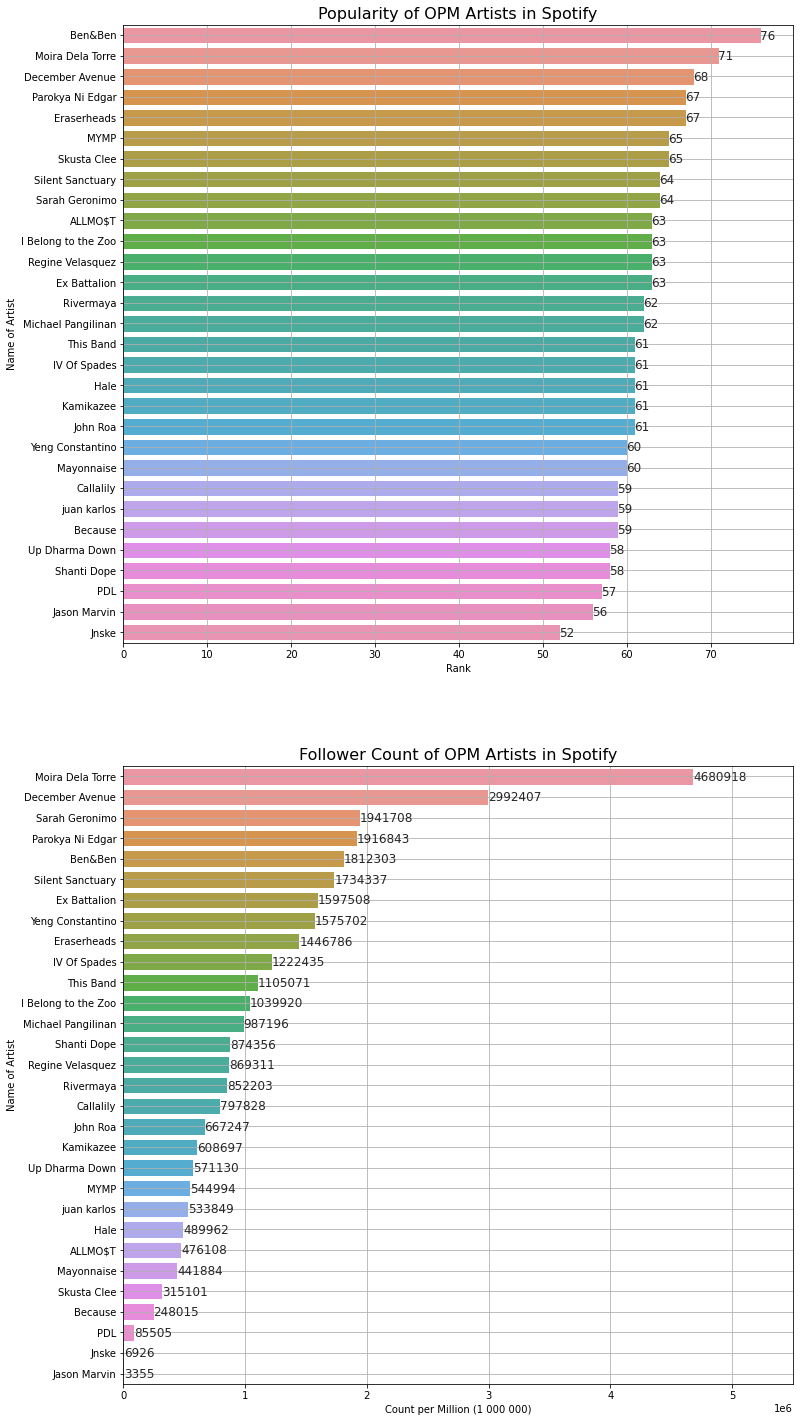

In [18]:
f, axes = plt.subplots(2, 1, figsize=(12, 25))

with sns.axes_style("darkgrid"):
    sns.set()
    sns.set(font_scale = 1)
    spotify_pop = sns.barplot(y="artist", x="popularity", 
                              data=spotify.sort_values(by='popularity', 
                                                       ascending=False),
                              ax=axes[0])
    spotify_pop.set_title('Popularity of OPM Artists in Spotify',size = 16)
    spotify_pop.set(ylabel="Name of Artist", xlabel = "Rank")
    spotify_pop.grid(b=True)


    for p in spotify_pop.patches:
        width = p.get_width()
        spotify_pop.text(width -0.1  ,
                p.get_y()+p.get_height()/2. + 0.2,
                '{}'.format(int(width)),
                ha="left")


    spotify_followers = sns.barplot(y="artist", x="followers",
                                    data= spotify.sort_values(by='followers',
                                                              ascending=False),
                                    ax=axes[1])
    spotify_followers.set_title('Follower Count of OPM Artists in Spotify',
                                size =16)
    spotify_followers.set(ylabel="Name of Artist",
                          xlabel = "Count per Million (1 000 000)")
    spotify_followers.set_xlim(0,5_500_000)
    spotify_followers.grid(b=True)

    for p in spotify_followers.patches:
        width = p.get_width()
        spotify_followers.text(width -0.1,
                p.get_y() + p.get_height()/2 + 0.2,
                '{}'.format(int(width)),
                ha="left")
    plt.subplots_adjust(hspace = 0.2)
    plt.show()

Observations:

- The artists fall between the __50 – 75 range__ in terms of __popularity__ in Spotify with __Ben&Ben__ leading at rank 71 and __Jnske__ lagging behind at rank 52.
- The disparity in follower count is evident in Spotify. __Moira Dela Torre__ leads the bunch with 14% of the total follower count and __Jason Marvin__ at the bottom with 0.02%.



## Top Level Exploratory Data Analysis for YouTube Data

In [19]:
youtube.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   artist       30 non-null     object
 1   views        30 non-null     object
 2   subscribers  30 non-null     object
dtypes: object(3)
memory usage: 960.0+ bytes


Views and subscribers in the dataframe are stored as string data. We need to convert them to integer format in order to sort artists by views and subscribers. 

In [20]:
youtube = youtube.astype({"views": int, "subscribers": int}) 

In [21]:
youtube.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   artist       30 non-null     object
 1   views        30 non-null     int64 
 2   subscribers  30 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 960.0+ bytes


In [22]:
youtube['views(%)'] = youtube['views']/(youtube['views'].sum())*100
youtube['subscribers(%)'] = (youtube['subscribers']/
                             (youtube['subscribers'].sum())*100)

youtube

,artist,views,subscribers,views(%),subscribers(%)
index,,,,,
0,December Avenue,23849952,36600,1.038787,0.335100
1,Ben&Ben,100462432,919000,4.375652,8.414133
2,Moira Dela Torre,32126025,572000,1.399253,5.237088
3,This Band,1156303,21600,0.050363,0.197764
4,I Belong to the Zoo,181123724,509000,7.888864,4.660276
5,Skusta Clee,17811116,75600,0.775765,0.692175
6,Parokya ni Edgar - Topic,8003115,87200,0.348577,0.798381
7,Silent Sanctuary Official,4426687,119000,0.192805,1.089534
8,Panty Droppaz League,337292688,698000,14.690820,6.390712


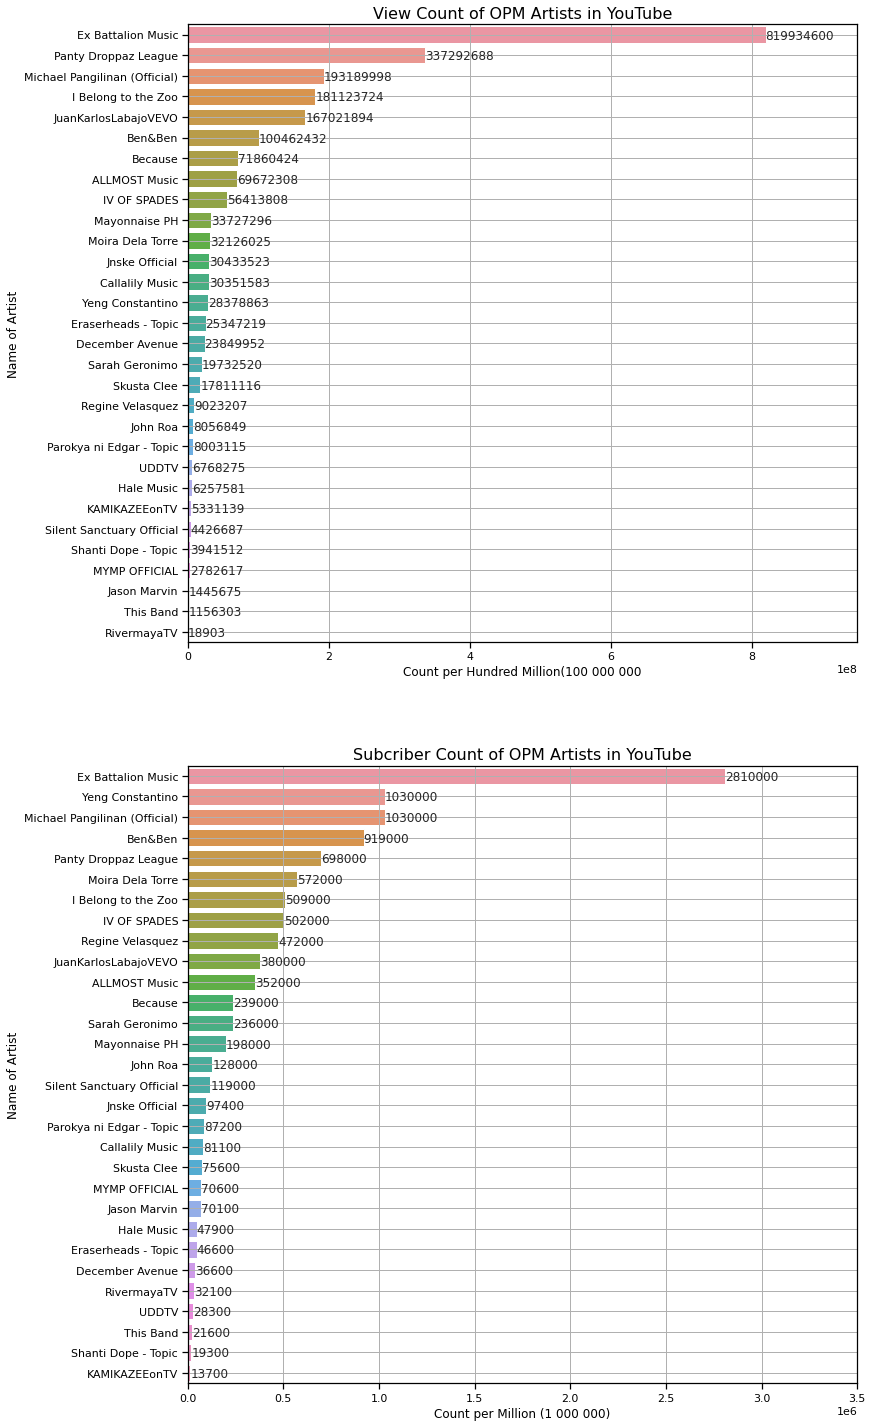

In [23]:
f, axes = plt.subplots(2, 1, figsize=(12, 25))

sns.set(font_scale = 1)

yt_views = sns.barplot(y="artist", x="views", 
                       data= youtube.sort_values(by='views', 
                                                 ascending=False), ax=axes[0])
yt_views.set_title('View Count of OPM Artists in YouTube',size = 16)
yt_views.set(ylabel="Name of Artist",
             xlabel = "Count per Hundred Million(100 000 000")
yt_views.set_xlim(0,950_000_000)
yt_views.grid(b=True)

for p in yt_views.patches:
    width = p.get_width()
    yt_views.text(width -0.1  ,
            p.get_y()+p.get_height()/2. + 0.2,
            '{}'.format(int(width)),
            ha="left")

yt_subs = sns.barplot(y="artist", x="subscribers", 
                      data= youtube.sort_values(by='subscribers', 
                                                ascending=False), ax=axes[1])
yt_subs.set_title('Subcriber Count of OPM Artists in YouTube', size =16)
yt_subs.set(ylabel="Name of Artist", xlabel = "Count per Million (1 000 000)")
yt_subs.set_xlim(0,3_500_000)
yt_subs.grid(b=True)

for p in yt_subs.patches:
    width = p.get_width()
    yt_subs.text(width -0.1  ,
            p.get_y()+p.get_height()/2. + 0.2,
            '{}'.format(int(width)),
            ha="left")
    
plt.subplots_adjust(hspace = 0.2)
plt.show()

Observations

- Greater disparity between parameter values (both __views__ and __subscribers__) is observed in YouTube data. 
- __Ex Battalion__ overwhelmingly got the highest view count at 36% share on the total views obtained by all artists with __Rivermaya__ at the bottom with only 0.008%
- Consistently, __Ex Battalion__ maintained the top spot in terms of subscriber count having a massive 26% share on the total subscribers of all artists with __KAMIKAZEE__ lagging behind with 0.12%.


# Visualizations and Conclusions

## Correlation

In [24]:
artist_match = {}
for i in match.index:
    artist_match[match['youtube'][i]] = match['spotify'][i]

youtube['artist'].replace(artist_match, inplace = True)

In [25]:
df = youtube.merge(spotify, on = 'artist')
df['views'] = df['views'].astype('int64')
df['subscribers'] = df['subscribers'].astype('int64')

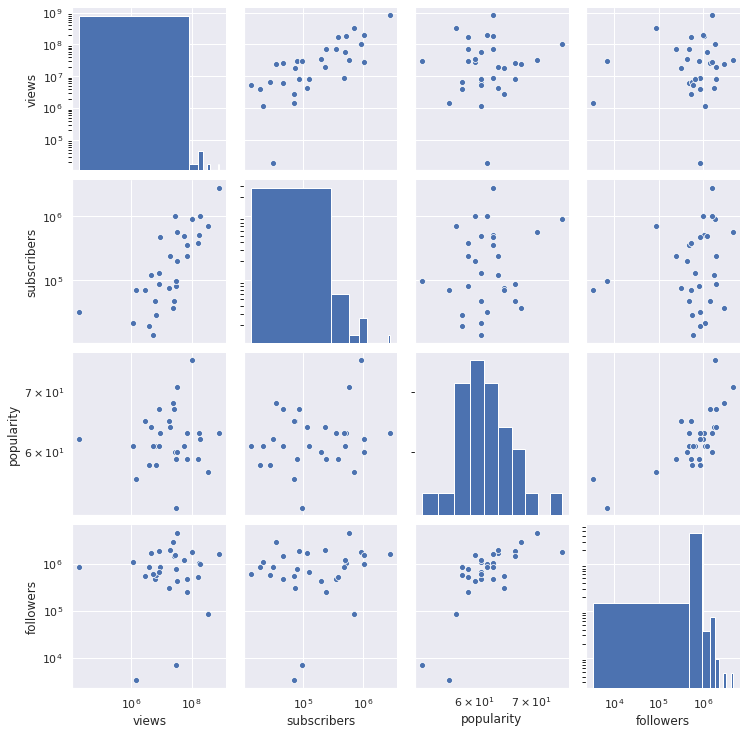

In [26]:
ax1 = sns.pairplot(df[['views', 'subscribers','popularity', 'followers']])
ax1.set(yscale = 'log', xscale = 'log');

In [27]:
values = [youtube['views'],
          youtube['subscribers'],
          spotify['popularity'],
          spotify['followers']]

correlations = {}
for x,y in itertools.combinations(values, 2):
    p_val = stats.pearsonr(x,y)
    s_val = stats.spearmanr(x,y)
    correlations[f'{x.name}-{y.name}'] = {'Pearson R':           p_val[0],
                                          'Pearson p-value'  :   p_val[1],
                                          'Spearman correlation':s_val[0],
                                          'Spearman p-value':    s_val[1]}


In [28]:
pd.DataFrame(correlations).T

,Pearson R,Pearson p-value,Spearman correlation,Spearman p-value
views-subscribers,0.893667,2.987515e-11,0.805874,7.718011e-08
views-popularity,0.059384,7.552560e-01,0.283355,1.291798e-01
views-followers,0.160639,3.964391e-01,0.386874,3.468770e-02
subscribers-popularity,0.078001,6.820249e-01,0.247963,1.864400e-01
subscribers-followers,0.297144,1.107957e-01,0.420291,2.075120e-02
popularity-followers,0.698837,1.743249e-05,0.674867,4.304352e-05


As seen on the scatter plots, and based on aligned results for both the Pearson Correlation Cofficient and Spearman correlation coefficient, only internal measures are strongly correlated with each other. Specifically, a high __popularity__ in Spotify translate to more artist __followers__ in Spotify at 0.698; and YouTube __views__ translate to more YouTube __subscribers__ at 0.894.

Meanwhile, measures between the two platforms have low to correlation, with YouTube __subscribers__ and Spotify __followers__ at the highest at 0.202. Moreover, YouTube __views__ even have a negative correlation to Spotify __popularity__ at -0.014.

## Ranking

### Ranking of Artists in Spotify



In [29]:
spotify_ranking = df[['artist','popularity','followers']]

In [30]:
spotify_ranking.head()

,artist,popularity,followers
0,December Avenue,68,2992407
1,Ben&Ben,76,1812303
2,Moira Dela Torre,71,4680918
3,This Band,61,1105071
4,I Belong to the Zoo,63,1039920


In [31]:
spotify_ranking['Rank'] = spotify_ranking[['popularity','followers']].\
                            apply(tuple, axis=1).rank(method='dense',
                                                      ascending=False).\
                                                      astype(int)

spotify_ranking.sort_values(by='Rank')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,artist,popularity,followers,Rank
1,Ben&Ben,76,1812303,1
2,Moira Dela Torre,71,4680918,2
0,December Avenue,68,2992407,3
6,Parokya Ni Edgar,67,1916843,4
10,Eraserheads,67,1446786,5
15,MYMP,65,544994,6
5,Skusta Clee,65,315101,7
13,Sarah Geronimo,64,1941708,8
7,Silent Sanctuary,64,1734337,9
19,Ex Battalion,63,1597508,10


### Ranking of Artists in YouTube

In [32]:
youtube_ranking = df[['artist','views','subscribers']]

In [33]:
youtube_ranking.head()

,artist,views,subscribers
0,December Avenue,23849952,36600
1,Ben&Ben,100462432,919000
2,Moira Dela Torre,32126025,572000
3,This Band,1156303,21600
4,I Belong to the Zoo,181123724,509000


In [34]:
youtube_ranking['Rank'] = youtube_ranking[['views','subscribers']].\
                            apply(tuple, axis=1).rank(method='dense',
                                                      ascending=False).\
                                                      astype(int)

youtube_ranking.sort_values(by='Rank')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,artist,views,subscribers,Rank
19,Ex Battalion,819934600,2810000,1
8,PDL,337292688,698000,2
16,Michael Pangilinan,193189998,1030000,3
4,I Belong to the Zoo,181123724,509000,4
12,juan karlos,167021894,380000,5
1,Ben&Ben,100462432,919000,6
26,Because,71860424,239000,7
9,ALLMO$T,69672308,352000,8
11,IV Of Spades,56413808,502000,9
22,Mayonnaise,33727296,198000,10


### Consolidated Ranking Results

- Merge the ranks obtained per platform
- Create a consolidated graph for ranking of the OPM artists. 
- Divide the graph into 4 clusters and label each as follows:
    - Popular on YouTube (upper-left)
    - Not Popular on Both (upper-right)
    - Popular on Both (lower-left)
    - Popular on Spotify (lower-right) 


In [35]:
rank_df = spotify_ranking.merge(youtube_ranking, on='artist', how='inner')

rank_df = rank_df.rename(columns={'Rank_x':'Spotify Rank','Rank_y':'YouTube Rank'})

rank_df = rank_df[['artist','Spotify Rank','YouTube Rank']]

rank_df.sort_values('artist')

,artist,Spotify Rank,YouTube Rank
9,ALLMO$T,13,8
26,Because,25,7
1,Ben&Ben,1,6
14,Callalily,23,13
0,December Avenue,3,16
10,Eraserheads,5,15
19,Ex Battalion,10,1
17,Hale,20,23
4,I Belong to the Zoo,11,4
11,IV Of Spades,16,9


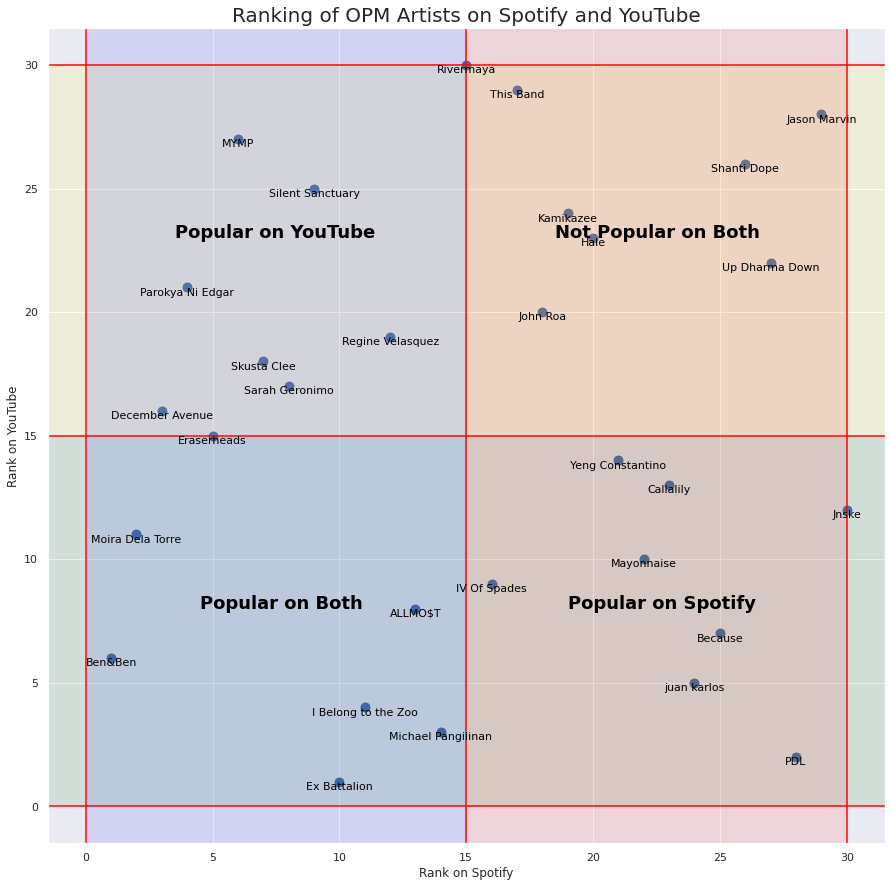

In [36]:
f, ax = plt.subplots(figsize=(15, 15))
sns.set()
sns.set(font_scale = 1.5)

ax = sns.scatterplot(x="Spotify Rank", y="YouTube Rank", data= rank_df, s=120)
ax.set_title('Ranking of OPM Artists on Spotify and YouTube',size = 20)
ax.set(xlabel="Rank on Spotify", ylabel = "Rank on YouTube")
ax.grid(b=True)
# ax.set_xlim(0,33)
# ax.set_ylim(0,33)
ax.axvline(x=0, color='red')
ax.axvline(x=15, color='red')
ax.axvline(x=30, color='red')
ax.axhline(y=0, color='red')
ax.axhline(y=15, color='red')
ax.axhline(y=30, color='red')
ax.axhspan(0, 15, facecolor='green', alpha=0.1)
ax.axhspan(15, 30, facecolor='yellow', alpha=0.1)
ax.axvspan(15, 30, facecolor='red', alpha=0.1)
ax.axvspan(0, 15, facecolor='blue', alpha=0.1)
ax.text(3.5, 23, "Popular on YouTube", horizontalalignment='left', 
        size='medium', color='black', weight='semibold')
ax.text(18.5, 23, "Not Popular on Both", horizontalalignment='left', 
        size='medium', color='black', weight='semibold')
ax.text(4.5, 8, "Popular on Both", horizontalalignment='left', 
        size='medium', color='black', weight='semibold')
ax.text(19, 8, "Popular on Spotify", horizontalalignment='left', 
        size='medium', color='black', weight='semibold')

for line in range(0,rank_df.shape[0]):
     ax.text(rank_df['Spotify Rank'][line], 
             rank_df['YouTube Rank'][line], rank_df.artist[line], 
             ha='center',va='top', fontsize=11, color='black')


# Insights and Recommendations

Based on how the Top 30 OPM Artists of 2019 in Spotify performed in both platforms, we can definitely say that they have varied reception of consumers with both platforms considered. This can definitely change the way an artist is marketed from another so that their number of plays or views will be marginally profitable for how much it costs to get them to consumers. With the low correlation in performance from one platform to another, artists must also identify their goal moving forward: do they want to focus on one platform or do they want to diversify the availability of their music? The answer to these questions may affect the way they market and how their fans will respond should they change their strategies moving forward.

Moreover, given the relatively high correlation of metrics within each platform, artists must take every opportunity to encourage viewers or listeners to subscribe or follow. We can infer that the recommender systems in these platforms increases the likelihood of future content to be played by subscribers or followers. This in turn will translate to more profits for the artist.

For further studies on the performance of artists on various platforms, we recommend looking at the profile of the listeners for each content should this data be available. This may further show the behavior of music consumers and provide more insights in creating strategies for the music industry.

# References


1. Clapier, W., (2014, Jul 26). Music: Universal language of mankind, _Daily Record_ <br> Retrived from: https://www.dailyrecordnews.com/religion/music-universal-language-of-mankind/article_ef95074a-1475-11e4-85a9-0019bb2963f4.html

2. Cole, S., (2019, Sept 9). The Impact of Technology and Social Media on the Music Industry. Retrieved from: https://econsultancy.com/the-impact-of-technology-and-social-media-on-the-music-industry/

3. The OPM Ballads of the Philippines Will Make You Get Up and Sing (2019, Mar 27). <br> Retrieved from: https://newsroom.spotify.com/2019-03-27/the-opm-ballads-of-the-philippines-will-make-you-get-up-and-sing/#:~:text=Filipino%20pop%20music%2C%20otherwise%20known,the%20Filipino%20market%20and%20beyond.

4. Pandas rank by multiple columns (2020) <br> Retrieved from: https://www.thetopsites.net/article/50315276.shtml

5. Ritcher, F., (2018, Oct 12). The World's Favorite Music Genres. <br>Retrieved from: https://www.statista.com/chart/15763/most-popular-music-genres-worldwide/ 

6. What music genre does your country produce the most? (2019, Sep 25). _Tickx_ <br> Retrieved from: https://content.tickx.co.uk/en-gb/story/music-genre-by-country/ 